# Feasability of Opening a Rock Climbing Gym in Vancouver, British Columbia

## Battle of the Neighborhoods (Week 2) - Notebook w/ Code

In [1]:
# Import required libraries

import pandas as pd # Library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import required libraries

import requests # Library to handle requests

!conda install -c conda-forge geopy --yes # Geopy installation package
from geopy.geocoders import Nominatim # Convert an address into latitude/longitude values

! pip install folium==0.5.0 # Folium Installation package
import folium # Library for rendering maps

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                   \failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|2_73_pypy|3_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3.4.*|

### Dataframe Creation

#### Population Data

In [3]:
# Create lists to store neighborhood names and associated populations
neigh_list = ['Arbutus Ridge','Downtown','Dunbar-Southlands','Fairview','Grandview-Woodland',
             'Hastings-Sunrise','Kensington-Cedar Cottage','Kerrisdale','Killarney','Kitsilano',
             'Marpole','Mount Pleasant','Musqueam','Oakridge','Renfrew-Collingwood','Riley Park',
             'Shaughnessy','South Cambie','Strathcona','Sunset','Victoria-Fraserview',
             'West End','West Point Grey']
pop_list = [15908,54690,21754,31432,27297,33992,47471,14732,28458,41371,23832,26400,1569,
           12443,50495,21794,8807,7682,12170,36286,30711,44543,12803]

# Create dataframe to store Vancouver population data by neighborhood
neigh_pop = pd.DataFrame(list(zip(neigh_list, pop_list)), 
               columns =['Neighborhood', 'Population (2011)'])
neigh_pop

,Neighborhood,Population (2011)
0,Arbutus Ridge,15908
1,Downtown,54690
2,Dunbar-Southlands,21754
3,Fairview,31432
4,Grandview-Woodland,27297
5,Hastings-Sunrise,33992
6,Kensington-Cedar Cottage,47471
7,Kerrisdale,14732
8,Killarney,28458
9,Kitsilano,41371


In [4]:
neigh_pop.sort_values(by = 'Population (2011)', ascending = False)

,Neighborhood,Population (2011)
1,Downtown,54690
14,Renfrew-Collingwood,50495
6,Kensington-Cedar Cottage,47471
21,West End,44543
9,Kitsilano,41371
19,Sunset,36286
5,Hastings-Sunrise,33992
3,Fairview,31432
20,Victoria-Fraserview,30711
8,Killarney,28458


In [5]:
# Total population of Vancouver during 2011
pop_2011 = neigh_pop['Population (2011)'].sum()
print('The approximate population of Vancouver during 2011 was {}.'.format(pop_2011))

The approximate population of Vancouver during 2011 was 606640.


In [6]:
# The code was removed by Watson Studio for sharing.

#### Business Data

In [7]:
"""
Create dataframe to store Vancouver business licence data
"""

body = client_7de401550a6447db83336f61dc6f7a36.get_object(Bucket='courseracapstone-donotdelete-pr-gulobge2viwrrq',Key='business-licences.xlsx')['Body']

# Add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

licences = pd.read_excel(io.BytesIO(body.read()))
licences.head()

,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,BusinessSubType,Unit,UnitType,House,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
0,13,1782160,13-162746,0,(Martha Cheney),NaN,Issued,2013-03-14 10:39:53-07:00,2013-12-31,Cosmetologist,Hair Stylist/Hairdresser,NaN,NaN,4536,MAIN ST,Vancouver,BC,CA,V5V 3R5,Riley Park,0.0,151.0,2019-07-21 13:49:06-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1009268..."
1,13,1782163,13-162749,0,Barry K T Li (Barry Li),NaN,Issued,2013-01-03 21:30:10-08:00,2013-12-31,Cosmetologist,Hair Stylist/Hairdresser,NaN,NaN,6228,EAST BOULEVARD,Vancouver,BC,CA,V6M 3V7,Kerrisdale,1.0,129.0,2019-07-21 13:49:06-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1548198..."
2,13,1782165,13-162751,0,Bella Bella Nails - Spa Ltd,NaN,Issued,2013-01-14 13:25:54-08:00,2013-12-31,Cosmetologist,Esthetician,NaN,NaN,1284,ROBSON ST,Vancouver,BC,CA,V6E 1C1,West End,10.0,129.0,2019-07-21 13:49:06-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1286044..."
3,13,1782166,13-162752,0,(Katherine Lauriente),Lauriente's Hair Co,Issued,2013-01-03 14:19:15-08:00,2013-12-31,Cosmetologist,Hair Stylist/Hairdresser,NaN,NaN,1082,Hornby St,Vancouver,BC,CA,V6Z 1V6,Downtown,1.0,129.0,2019-07-21 13:49:06-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1257421..."
4,13,1782167,13-162753,0,Yun Hee Kim (Yun Kim),NaN,Issued,2012-12-07 20:46:13-08:00,2013-12-31,Cosmetologist,Esthetician,NaN,NaN,431,DAVIE ST,Vancouver,BC,CA,V6B 2G2,Downtown,1.0,129.0,2019-07-21 13:49:06-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1231300..."


In [8]:
# Extract the necessary business columns
licences2 = licences[['BusinessName','LocalArea']].copy()

# Drop any missing values
licences3 = licences2.dropna()

# Rename 'BusinessName' to 'Businesses'
licences3.rename(columns = {'BusinessName': 'Businesses'}, inplace = True)

# Rename 'LocalArea' to 'Neighborhood'
licences3.rename(columns = {'LocalArea': 'Neighborhood'}, inplace = True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
licences3.head()

,Businesses,Neighborhood
0,(Martha Cheney),Riley Park
1,Barry K T Li (Barry Li),Kerrisdale
2,Bella Bella Nails - Spa Ltd,West End
3,(Katherine Lauriente),Downtown
4,Yun Hee Kim (Yun Kim),Downtown


In [10]:
# Sort the businesses by neighborhood and initiate a count
licences4 = licences3.groupby('Neighborhood', as_index = False).count()
licences4.reset_index()

# Sort the number of values by neighborhood and organize in descencding order
licences5 = licences4.sort_values(by = ['Businesses'], ascending = False)
licences5.reset_index(drop=True)
licences5

,Neighborhood,Businesses
1,Downtown,86470
3,Fairview,32362
9,Kitsilano,26176
11,Mount Pleasant,22490
20,West End,21822
6,Kensington-Cedar Cottage,20698
4,Grandview-Woodland,17194
13,Renfrew-Collingwood,15291
18,Sunset,14146
17,Strathcona,12768


In [11]:
# Sort the number of values by neighborhood and organize in descencding order
licences6 = licences4.sort_values(by = ['Businesses'], ascending = False)
licences6.reset_index(drop=True)
licences6.head(8)

"""
Only the top 8 neighborhoods were considered as these were the most populous neighborhoods
until a large population change was noticed
"""

'\nOnly the top 8 neighborhoods were considered as these were the most populous neighborhoods\nuntil a large population change was noticed\n'

In [12]:
print('There were {} business licences issued in Vancouver since 2012-2013.'.format(licences.shape[0]))

There were 364474 business licences issued in Vancouver since 2012-2013.


#### Crime Data

In [13]:
"""
Create dataframe to store neighborhood crime statistics from 2019 
"""

body = client_7de401550a6447db83336f61dc6f7a36.get_object(Bucket='courseracapstone-donotdelete-pr-gulobge2viwrrq',Key='2019 Crime Stats-Total.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_stats = pd.read_excel(io.BytesIO(body.read()))
crime_stats

,Neighborhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons,Total
0,Arbutus Ridge,5,17,1,78,13,91,93,7,33,0,338
1,Downtown,166,1819,258,798,185,6221,4757,62,1580,463,16309
2,Dunbar-Southlands,6,16,2,85,13,167,97,2,64,2,454
3,Fairview,26,119,13,317,48,851,918,7,254,17,2570
4,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21,2278
5,Hastings-Sunrise,27,118,12,197,85,656,260,2,207,7,1571
6,Kensington-Cedar Cottage,27,155,24,206,86,652,436,7,263,22,1878
7,Kerrisdale,3,18,3,138,23,150,101,4,46,3,489
8,Killarney,11,50,4,77,38,248,165,2,80,7,682
9,Kitsilano,20,92,10,254,61,612,546,9,212,9,1825


In [14]:
# Drop row for Stanley Park in order to maintain dataframe consistency
crime_stats2 = crime_stats.drop([18])
crime_stats3 = crime_stats2.reset_index(drop=True)
crime_stats3

# Sort the number of values by neighborhood and organize in descencding order
crime_stats4 = crime_stats3.sort_values(by = ['Total'], ascending = False)
crime_stats4.reset_index(drop = True)

,Neighborhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons,Total
0,Downtown,166,1819,258,798,185,6221,4757,62,1580,463,16309
1,West End,52,347,42,309,104,1554,1134,17,385,21,3965
2,Strathcona,42,734,107,341,101,841,693,60,442,187,3548
3,Mount Pleasant,28,229,29,379,116,862,1087,17,288,35,3070
4,Fairview,26,119,13,317,48,851,918,7,254,17,2570
5,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21,2278
6,Renfrew-Collingwood,12,143,31,209,113,670,642,7,213,17,2057
7,Kensington-Cedar Cottage,27,155,24,206,86,652,436,7,263,22,1878
8,Kitsilano,20,92,10,254,61,612,546,9,212,9,1825
9,Hastings-Sunrise,27,118,12,197,85,656,260,2,207,7,1571


In [15]:
"""
Create a new data frame to store the top 8 neighborhoods according to total crime. The first
8 neighborhoods were chosen for similar reasons as the neighborhood businesses were chosen. 
"""
crime_stats5 = crime_stats4.head(8)
crime_stats5

,Neighborhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons,Total
1,Downtown,166,1819,258,798,185,6221,4757,62,1580,463,16309
21,West End,52,347,42,309,104,1554,1134,17,385,21,3965
18,Strathcona,42,734,107,341,101,841,693,60,442,187,3548
11,Mount Pleasant,28,229,29,379,116,862,1087,17,288,35,3070
3,Fairview,26,119,13,317,48,851,918,7,254,17,2570
4,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21,2278
14,Renfrew-Collingwood,12,143,31,209,113,670,642,7,213,17,2057
6,Kensington-Cedar Cottage,27,155,24,206,86,652,436,7,263,22,1878


#### Neighborhood Coordinates

In [16]:
"""
Create dataframe to store neighborhood coordinates
"""
body = client_7de401550a6447db83336f61dc6f7a36.get_object(Bucket='courseracapstone-donotdelete-pr-gulobge2viwrrq',Key='neighborhood coordinates.xlsx')['Body']

# Add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

neigh_coordinates = pd.read_excel(io.BytesIO(body.read()))
neigh_coordinates

,Neighborhood,Latitude,Longitude
0,Arbutus Ridge,49.2536,-123.1604
1,Downtown,49.2820,-123.1171
2,Dunbar-Southlands,49.2376,-123.1639
3,Fairview,49.2635,-123.1313
4,Grandview-Woodland,49.2767,-123.0695
5,Hastings-Sunrise,49.2811,-123.0441
6,Kensington-Cedar Cottage,49.2501,-123.0761
7,Kerrisdale,49.2341,-123.1554
8,Killarney,49.2202,-123.0413
9,Kitsilano,49.2684,-123.1683


In [17]:
# Drop Stanley Park dataframe entry in order to maintain datframe consistency
neigh_coordinates2 = neigh_coordinates.drop([18])
neigh_coordinates3 = neigh_coordinates2.reset_index(drop=True)
neigh_coordinates3

,Neighborhood,Latitude,Longitude
0,Arbutus Ridge,49.2536,-123.1604
1,Downtown,49.2820,-123.1171
2,Dunbar-Southlands,49.2376,-123.1639
3,Fairview,49.2635,-123.1313
4,Grandview-Woodland,49.2767,-123.0695
5,Hastings-Sunrise,49.2811,-123.0441
6,Kensington-Cedar Cottage,49.2501,-123.0761
7,Kerrisdale,49.2341,-123.1554
8,Killarney,49.2202,-123.0413
9,Kitsilano,49.2684,-123.1683


#### Population and Neighborhood Coordinates

In [18]:
# Merge population dataframe and neighborhood coordinates dataframe
df_Van_locations = pd.merge(neigh_pop, neigh_coordinates3)
df_Van_locations

,Neighborhood,Population (2011),Latitude,Longitude
0,Arbutus Ridge,15908,49.2536,-123.1604
1,Downtown,54690,49.2820,-123.1171
2,Dunbar-Southlands,21754,49.2376,-123.1639
3,Fairview,31432,49.2635,-123.1313
4,Grandview-Woodland,27297,49.2767,-123.0695
5,Hastings-Sunrise,33992,49.2811,-123.0441
6,Kensington-Cedar Cottage,47471,49.2501,-123.0761
7,Kerrisdale,14732,49.2341,-123.1554
8,Killarney,28458,49.2202,-123.0413
9,Kitsilano,41371,49.2684,-123.1683


In [19]:
"""
Create dataframe to store real estate prices
"""
body = client_7de401550a6447db83336f61dc6f7a36.get_object(Bucket='courseracapstone-donotdelete-pr-gulobge2viwrrq',Key='Real Estate Prices.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

real_estate = pd.read_excel(io.BytesIO(body.read()))
real_estate.sort_values(by = 'Average Sale Price ($)', ascending = False, inplace = True)
real_estate

,Neighborhood,Average Sale Price ($)
16,Shaughnessy,3800000.0
0,Arbutus Ridge,3100000.0
23,West Point Grey,2700000.0
2,Dunbar-Southlands,2700000.0
7,Kerrisdale,1800000.0
13,Oakridge,1700000.0
20,Sunset,1640000.0
8,Killarney,1600000.0
15,Riley Park,1499000.0
5,Hastings-Sunrise,1400000.0


In [20]:
# No real estate prices were available for Musqueam and Stanley Park

#### Map Definition Creation

In [21]:
"""
A map of the city of Vancouver was created in order to show the interested
parties the the totality of the area that may house the new business. In order to do
this, a geocoder instance must be defined to retrieve the coordinates of Vancouver, Canada.
"""

# Define the Geolocation coordinates for Vancouver, British Columbia
address = 'Vancouver, Canada'

geolocator = Nominatim(user_agent = "Vancouver_explorer")
location = geolocator.geocode(address)
Van_latitude = location.latitude
Van_longitude = location.longitude
print('The geograpical coordinates of Vancouver, Canada are {}, {}.'.format(Van_latitude, Van_longitude))

The geograpical coordinates of Vancouver, Canada are 49.2608724, -123.1139529.


### Data Visualization

Bar charts were created in order to give the interested parties a visual representation of the the neighborhood characteristics included.

In [22]:
# Import required libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Business Data

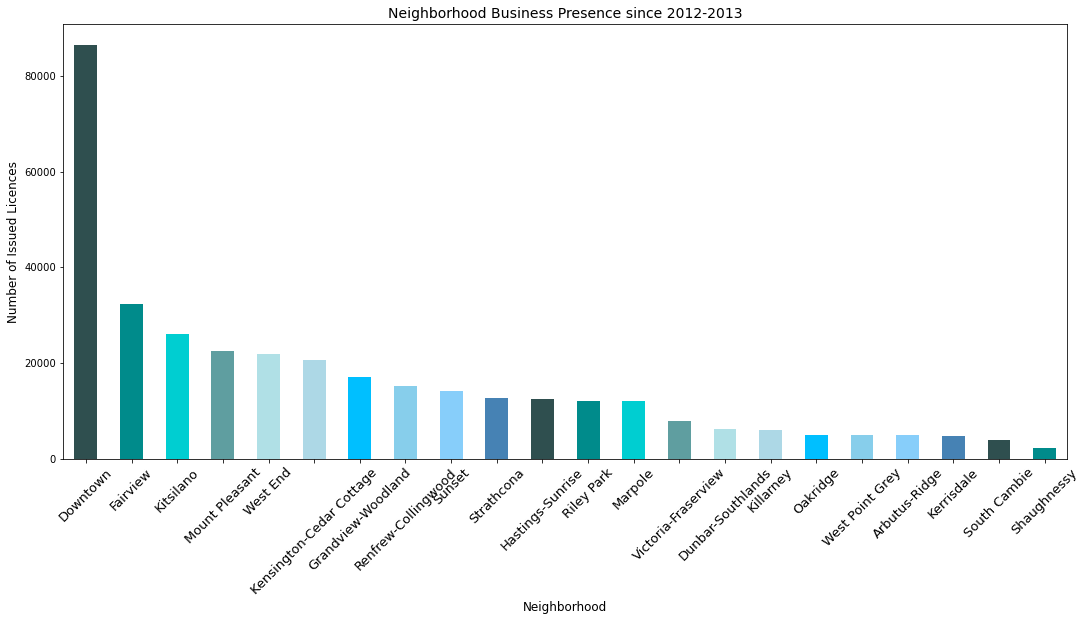

In [23]:
# Create bar chart to show business presence by neighborhood
licences6.plot.bar(x = 'Neighborhood', y = 'Businesses', legend = None, rot= 45, figsize = (18, 8), color = ['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Issued Licences', fontsize = 12)
plt.xticks(fontsize = 13)
plt.xlabel('Neighborhood', fontsize = 12)
plt.title('Neighborhood Business Presence since 2012-2013', fontsize = 14)
plt.show()

#### Crime Data

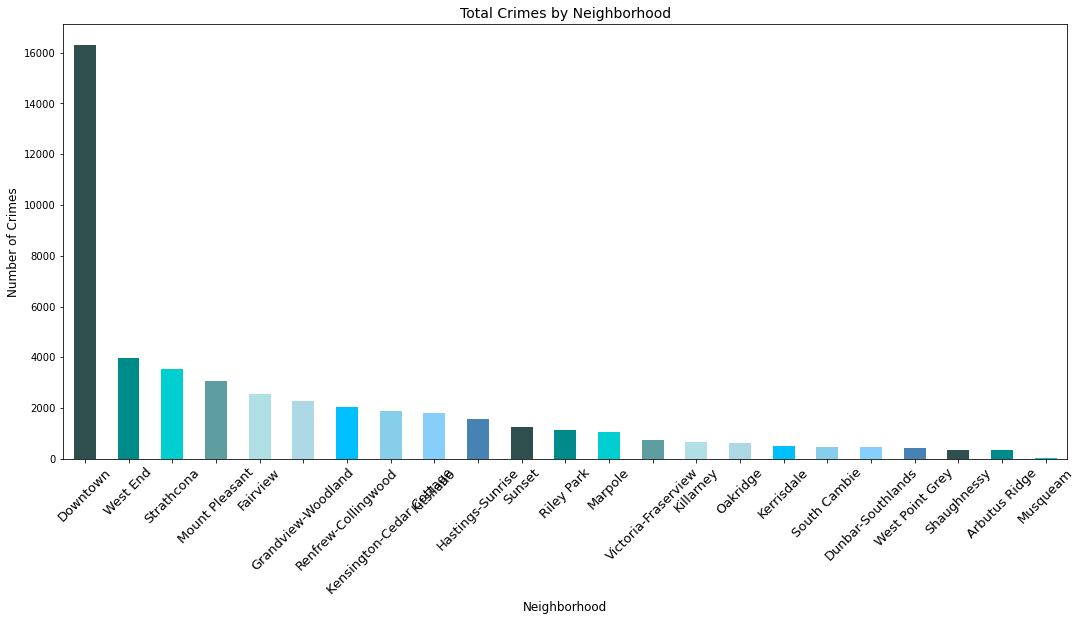

In [24]:
# Create bar chart to show crime presence by neighborhood
crime_stats4.plot.bar(x = 'Neighborhood', y = 'Total', legend = None, rot= 45, figsize = (18, 8), color = ['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Crimes', fontsize = 12)
plt.xticks(fontsize = 13)
plt.xlabel('Neighborhood', fontsize = 12)
plt.title('Total Crimes by Neighborhood', fontsize = 14)
plt.show()

#### Real Estate Data

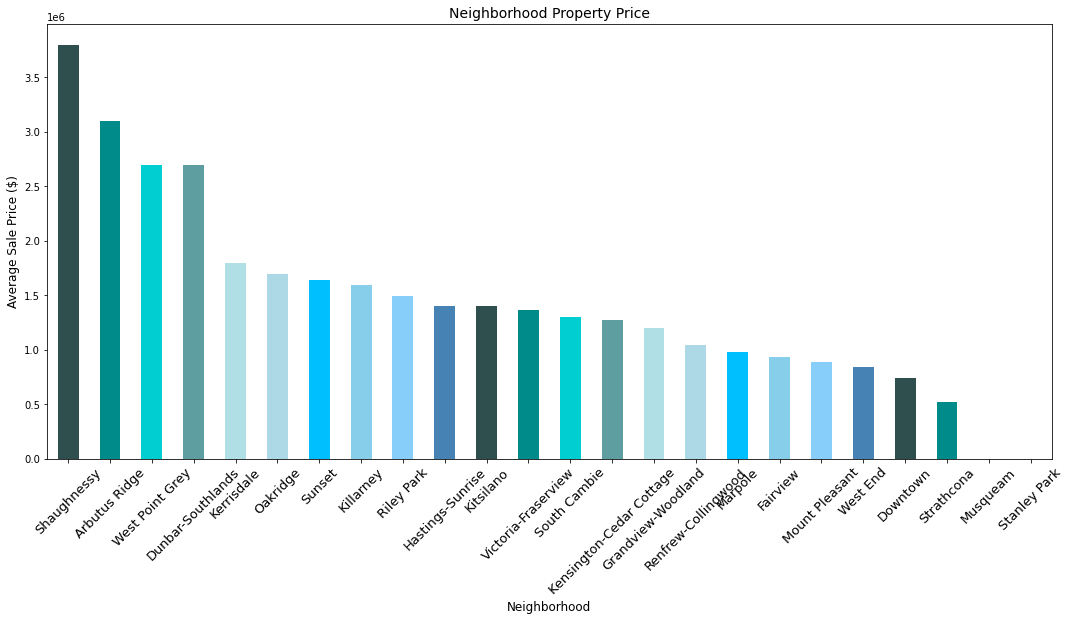

In [25]:
# Create bar chart to show real estate cost by neighborhood
real_estate.plot.bar(x = 'Neighborhood', y = 'Average Sale Price ($)', legend = None, rot= 45, figsize = (18, 8), color = ['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Average Sale Price ($)', fontsize = 12)
plt.xticks(fontsize = 13)
plt.xlabel('Neighborhood', fontsize = 12)
plt.title('Neighborhood Property Price', fontsize = 14)
plt.show()

In [26]:
"""
Create a new merged dataset that shows the neighborhoods with the highest business presence
that are also within the top neighborhoods for crime in Vancouver
"""
biz_crime = licences6.merge(crime_stats5, on=['Neighborhood'])
"""
Remove all common values from your list of top 8 neighborhoods for businesses
"""
df_Van = licences6[(~licences6.Neighborhood.isin(biz_crime.Neighborhood))]

# Top neighborhoods for business without the bulk of the crime
df_Van

,Neighborhood,Businesses
9,Kitsilano,26176
18,Sunset,14146
5,Hastings-Sunrise,12581
14,Riley Park,12098
10,Marpole,12093
19,Victoria-Fraserview,7940
2,Dunbar-Southlands,6172
8,Killarney,5983
12,Oakridge,5017
21,West Point Grey,4977


In [27]:
# Merge dataframe of top neighborhoods without bulk of crime with population and coordinates
df_Van_top = pd.merge(df_Van, df_Van_locations, on = 'Neighborhood')
df_Van_top

,Neighborhood,Businesses,Population (2011),Latitude,Longitude
0,Kitsilano,26176,41371,49.2684,-123.1683
1,Sunset,14146,36286,49.2183,-123.0910
2,Hastings-Sunrise,12581,33992,49.2811,-123.0441
3,Riley Park,12098,21794,49.2405,-123.1015
4,Marpole,12093,23832,49.2107,-123.1302
5,Victoria-Fraserview,7940,30711,49.2203,-123.0659
6,Dunbar-Southlands,6172,21754,49.2376,-123.1639
7,Killarney,5983,28458,49.2202,-123.0413
8,Oakridge,5017,12443,49.2261,-123.1166
9,West Point Grey,4977,12803,49.2610,-123.2001


In [28]:
# The dataframe above shows the priority list for neighborhood selection (Further analysis to confirm)

#### Foursquare Data

In [29]:
import json # Library to handle JSON files

# Library to transorm JSON file into a pandas dataframe 
from pandas.io.json import json_normalize 

In this section, data will be retrieved from Foursquare in order to continue the venue analyis.


In [30]:
"""
Get the name and coordinates of the first neighborhood in the newly created
boroughs dataframe (Tor_boroughs).
"""

Van_neighborhood1 = df_Van_locations.loc[0,'Neighborhood']
Vanlat_neighborhood1 = df_Van_locations.loc[0,'Latitude']
Vanlong_neighborhood1 = df_Van_locations.loc[0,'Longitude']
print('The latitude and longitude values of the first neighborhood: {} are {}, {}.'
      .format(Van_neighborhood1, Vanlat_neighborhood1, Vanlong_neighborhood1))

The latitude and longitude values of the first neighborhood: Arbutus Ridge are 49.2536, -123.1604.


In [31]:
# The code was removed by Watson Studio for sharing.

My credentails:
CLIENT_ID: 5ACOT0QJNRJGWBJBRWWHWEL0JRLOC1DCW0SMITYR310IEDIA
CLIENT_SECRET:TWAX2CJGBKSHWRRSB0ZOSJOTGCDDJ22UCJGGC2BA4JILX55N


In [32]:
"""
Retrieve the Top 100 venues that are within a 500 metre radius of the first
neighborhood in the dataframe.
"""

LIMIT = 100 # Number of venues returned by Foursquare API
radius = 500 # Define search radius around neighborhood

# Creat Foursquare URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Vanlat_neighborhood1, 
    Vanlong_neighborhood1, 
    radius, 
    LIMIT)

Fsquare_results = requests.get(url).json()
Fsquare_results

{'meta': {'code': 200, 'requestId': '5fc448df17d2040fe5cd2be8'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Vancouver',
  'headerFullLocation': 'Vancouver',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 49.2581000045, 'lng': -123.15351855545636},
   'sw': {'lat': 49.249099995499996, 'lng': -123.16728144454363}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52eac0d0498ecbdcb892bec7',
       'name': 'Wakwak Burger',
       'location': {'address': '511 Granville St',
        'crossStreet': 'at W Pender St',
        'lat': 49.252430278119675,
        'lng': -123.15995440067987,
        'labeled

In [33]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        ven_cat_list = row['categories']
    except:
        ven_cat_list = row['venue.categories']
        
    if len(ven_cat_list) == 0:
        return None
    else:
        return ven_cat_list[0]['name']

In [34]:
"""
Clean the resultant JSON file from the Foursquare request and organize the
results into a Pandas dataframe.
"""

venues = Fsquare_results['response']['groups'][0]['items']
    
close_venues = json_normalize(venues) # Flatten JSON

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
close_venues = close_venues.loc[:, filtered_columns]

# Filter the category for each row
close_venues['venue.categories'] = close_venues.apply(get_category_type, axis=1)

# Clean columns
close_venues.columns = [col.split(".")[-1] for col in close_venues.columns]

close_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Wakwak Burger,Food Truck,49.252430,-123.159954
1,Arbutus Village Park,Park,49.249486,-123.158716


In [35]:
print('There were {} venues returned by Foursquare.'.format(close_venues.shape[0]))

There were 2 venues returned by Foursquare.


In [38]:
"""
Define a function that returns all of the close by venues in the top neighborhoods
"""

def getCloseVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
        print(name)           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
            
        # make the GET request
        Fsquare_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in Fsquare_results])

    close_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    close_venues.columns = [
                'Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category'
            ]
    
    return(close_venues)

In [39]:
# Use above function to retrieve close by venues in the neighborhoods listed in the df_Van_top dataframe
Van_venues = getCloseVenues (
        names = df_Van_top['Neighborhood'],
        latitudes = df_Van_top['Latitude'],
        longitudes = df_Van_top['Longitude']
    )

# Display first few close venues    
Van_venues

Kitsilano
Sunset
Hastings-Sunrise
Riley Park
Marpole
Victoria-Fraserview
Dunbar-Southlands
Killarney
Oakridge
West Point Grey
Kerrisdale
South Cambie
Shaughnessy


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kitsilano,49.2684,-123.1683,The Only Cafe,49.268197,-123.165536,Café
1,Kitsilano,49.2684,-123.1683,The Naam Restaurant,49.268301,-123.167049,Vegetarian / Vegan Restaurant
2,Kitsilano,49.2684,-123.1683,Chewie’s Biscuit Co,49.268252,-123.168789,Southern / Soul Food Restaurant
3,Kitsilano,49.2684,-123.1683,Linh Cafe,49.268237,-123.169060,Breakfast Spot
4,Kitsilano,49.2684,-123.1683,Cafe Lokal,49.268174,-123.164710,Coffee Shop
5,Kitsilano,49.2684,-123.1683,Darby's Public House,49.268337,-123.168383,Pub
6,Kitsilano,49.2684,-123.1683,Nick Sushi,49.268447,-123.170643,Sushi Restaurant
7,Kitsilano,49.2684,-123.1683,Drexoll Games,49.268424,-123.169928,Toy / Game Store
8,Kitsilano,49.2684,-123.1683,Bangkok City Cafe,49.268475,-123.170646,Thai Restaurant
9,Kitsilano,49.2684,-123.1683,Olive + Ruby,49.264148,-123.169320,Café


In [40]:
# Number of venues present in each neighorhood
Van_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dunbar-Southlands,11,11,11,11,11,11
Hastings-Sunrise,27,27,27,27,27,27
Kerrisdale,38,38,38,38,38,38
Killarney,18,18,18,18,18,18
Kitsilano,39,39,39,39,39,39
Marpole,6,6,6,6,6,6
Oakridge,5,5,5,5,5,5
Riley Park,17,17,17,17,17,17
Shaughnessy,1,1,1,1,1,1


In [41]:
# Determine how many different types of venues are present
print('There are {} different types of venues.'.format(len(Van_venues['Venue Category'].unique())))

There are 82 different types of venues.


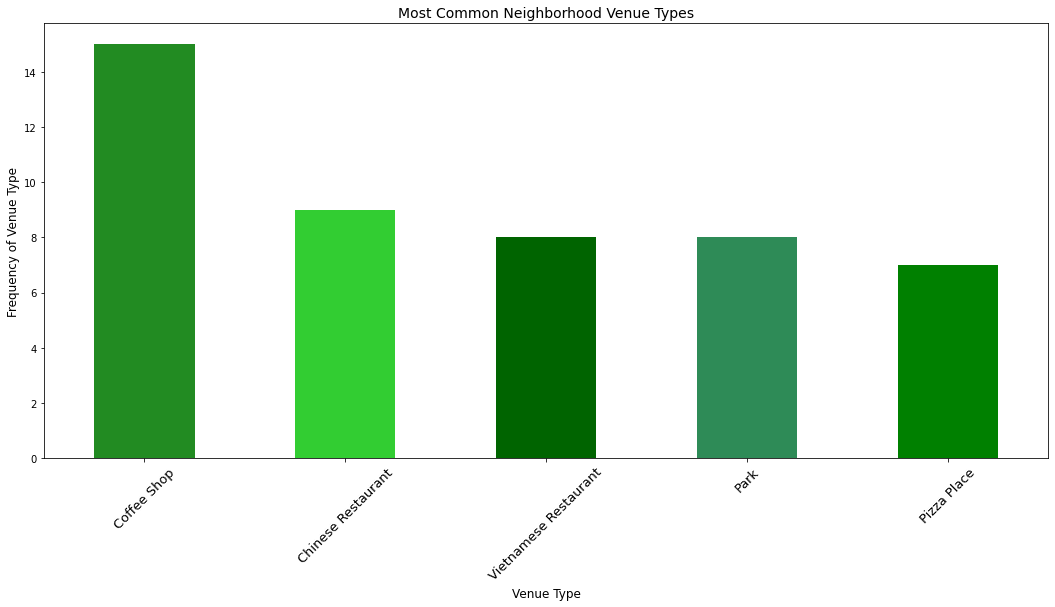

In [42]:
"""
Create dataframe to store the most common venues in the top neighborhoods based on
businesses and low crime
"""
Van_top_venues = Van_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
Van_top_venues = Van_top_venues[['Venue Category','Neighborhood']]
Van_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)

"""
Create a bar chart in order to visualize the most common venues in the top neighborhoods
based on businesses and low crime
"""
Van_top_venues.plot.bar(x = 'Venue Category', y = 'Frequency', legend = None,
                        title = 'Most Common Neighborhood Venue Types', rot= 45,
                        figsize = (18, 8), color = ['forestgreen','limegreen','darkgreen','seagreen','green','mediumseagreen'])
plt.ylabel('Frequency of Venue Type', fontsize = 12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Neighborhood Venue Types', fontsize = 14)
plt.show()

In [43]:
"""
Use one hot encoding in order to account for the venue type (categorical variable)
in the neighborhood. This provides binary representation for categorical variables.
"""
Van_onehot = pd.get_dummies(Van_venues[['Venue Category']], prefix = "", prefix_sep = "")

# Add neighborhood column back to dataframe
Van_onehot['Neighborhood'] = Van_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [Van_onehot.columns[-1]] + list(Van_onehot.columns[:-1])
Van_onehot = Van_onehot[fixed_columns]
Van_onehot

,Neighborhood,Amphitheater,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Baseball Stadium,Beer Garden,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Coffee Shop,Convenience Store,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Restaurant,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nightlife Spot,Noodle House,Outdoor Sculpture,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Stadium,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop
0,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kitsilano,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
Van_onehot.shape

(183, 83)

In [45]:
# Average frequency of presence of each venue type 
Van_grouped = Van_onehot.groupby('Neighborhood').mean().reset_index()
Van_grouped

,Neighborhood,Amphitheater,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Baseball Stadium,Beer Garden,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Coffee Shop,Convenience Store,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Restaurant,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nightlife Spot,Noodle House,Outdoor Sculpture,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shopping Mall,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Stadium,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop
0,Dunbar-Southlands,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Hastings-Sunrise,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.074074,0.000000,0.000000,0.074074,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.0,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.0,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.00,0.000000,0.111111,0.000000
2,Kerrisdale,0.000000,0.000000,0.026316,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.026316,0.000000,0.026316,0.026316,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.078947,0.105263,0.026316,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026316,0.026316,0.026316,0.000000,0.000000,0.026316,0.026316,0.000000,0.0,0.026316,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.052632,0.026316,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.052632,0.000000,0.078947,0.000000,0.000000,0.000000,0.026316,0.00,0.000000,0.026316,0.000000
3,Killarney,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.055556,0.0,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.055556,0.00,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.00000

In [46]:
# Create function in order to return the top five common venues in the neighborhood
num_top_venues = 5

for hood in Van_grouped['Neighborhood']:
    print(hood)
    temp = Van_grouped[Van_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Dunbar-Southlands
                      Venue  Frequency
0                  Pharmacy       0.09
1          Asian Restaurant       0.09
2        Athletics & Sports       0.09
3        Italian Restaurant       0.09
4  Mediterranean Restaurant       0.09


Hastings-Sunrise
                   Venue  Frequency
0  Vietnamese Restaurant       0.11
1                   Park       0.07
2            Event Space       0.07
3            Coffee Shop       0.07
4           Amphitheater       0.04


Kerrisdale
                Venue  Frequency
0         Coffee Shop       0.11
1            Tea Room       0.08
2  Chinese Restaurant       0.08
3            Pharmacy       0.05
4    Sushi Restaurant       0.05


Killarney
                Venue  Frequency
0  Chinese Restaurant       0.11
1      Sandwich Place       0.06
2    Sushi Restaurant       0.06
3  Salon / Barbershop       0.06
4         Gas Station       0.06


Kitsilano
               Venue  Frequency
0        Coffee Shop       0.10
1               

In [47]:
import numpy as np # Library for array/statistical analysis

# Create function in order to organize venues by descending commonality
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

suffix = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for suf in np.arange(num_top_venues):
    try:
        columns.append('{}{} Common'.format(suf+1, suffix[suf]))
    except:
        columns.append('{}th Common'.format(suf+1))

# Create a new dataframe
Van_sorted = pd.DataFrame(columns=columns)
Van_sorted['Neighborhood'] = Van_grouped['Neighborhood']

for suf in np.arange(Van_grouped.shape[0]):
    Van_sorted.iloc[suf, 1:] = return_most_common_venues(Van_grouped.iloc[suf, :], num_top_venues)

Van_sorted

,Neighborhood,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
0,Dunbar-Southlands,Italian Restaurant,Sushi Restaurant,Coffee Shop,Ice Cream Shop,Park,Nightlife Spot,Mediterranean Restaurant,Spa,Pharmacy,Asian Restaurant
1,Hastings-Sunrise,Vietnamese Restaurant,Event Space,Park,Coffee Shop,Amphitheater,Burger Joint,Indian Restaurant,Inn,Gas Station,Liquor Store
2,Kerrisdale,Coffee Shop,Chinese Restaurant,Tea Room,Pharmacy,Sushi Restaurant,Sandwich Place,Italian Restaurant,Mediterranean Restaurant,Dessert Shop,Noodle House
3,Killarney,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Salon / Barbershop,Sandwich Place,Bus Stop,Shopping Mall,Farmers Market,Coffee Shop
4,Kitsilano,Coffee Shop,Café,Park,Pizza Place,Indian Restaurant,Pub,Wine Shop,Chinese Restaurant,Japanese Restaurant,Bus Stop
5,Marpole,Pizza Place,Japanese Restaurant,Bus Stop,Taiwanese Restaurant,Bus Station,Plaza,Wine Shop,Fast Food Restaurant,Dessert Shop,Event Space
6,Oakridge,Playground,Light Rail Station,Bus Stop,Golf Course,Park,Wine Shop,Fast Food Restaurant,Event Space,Fair,Farm
7,Riley Park,Vietnamese Restaurant,Farmers Market,Chinese Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,Baseball Stadium,Grocery Store,Cantonese Restaurant,Playground
8,Shaughnessy,Bus Stop,Wine Shop,Food Truck,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Market
9,South Cambie,Coffee Shop,Café,Cafeteria,Bank,Outdoor Sculpture,Fish Market,Event Space,Fair,Farm,Farmers Market


### Clustering Neighborhoods

In [48]:
# Import required libraries

from sklearn.cluster import KMeans # Library for KMeans clustering

In [49]:
# Set parameters for k-means clustering

# Set number of clusters
kclusters = 5

Van_clustering = Van_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(Van_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 4], dtype=int32)

In [50]:
# Label clusters
Van_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Van_merged = df_Van_top

# Merge Van_grouped with Van_boroughs to add latitude/longitude for each neighborhood
Van_merged = Van_merged.join(Van_sorted.set_index('Neighborhood'), on = 'Neighborhood')
Van_merged

,Neighborhood,Businesses,Population (2011),Latitude,Longitude,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
0,Kitsilano,26176,41371,49.2684,-123.1683,1,Coffee Shop,Café,Park,Pizza Place,Indian Restaurant,Pub,Wine Shop,Chinese Restaurant,Japanese Restaurant,Bus Stop
1,Sunset,14146,36286,49.2183,-123.0910,2,South Indian Restaurant,Wine Shop,Fish Market,Convenience Store,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant
2,Hastings-Sunrise,12581,33992,49.2811,-123.0441,1,Vietnamese Restaurant,Event Space,Park,Coffee Shop,Amphitheater,Burger Joint,Indian Restaurant,Inn,Gas Station,Liquor Store
3,Riley Park,12098,21794,49.2405,-123.1015,1,Vietnamese Restaurant,Farmers Market,Chinese Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,Baseball Stadium,Grocery Store,Cantonese Restaurant,Playground
4,Marpole,12093,23832,49.2107,-123.1302,1,Pizza Place,Japanese Restaurant,Bus Stop,Taiwanese Restaurant,Bus Station,Plaza,Wine Shop,Fast Food Restaurant,Dessert Shop,Event Space
5,Victoria-Fraserview,7940,30711,49.2203,-123.0659,1,Convenience Store,Middle Eastern Restaurant,Pizza Place,Asian Restaurant,Pet Store,Park,Noodle House,Fish Market,Motorcycle Shop,Fair
6,Dunbar-Southlands,6172,21754,49.2376,-123.1639,1,Italian Restaurant,Sushi Restaurant,Coffee Shop,Ice Cream Shop,Park,Nightlife Spot,Mediterranean Restaurant,Spa,Pharmacy,Asian Restaurant
7,Killarney,5983,28458,49.2202,-123.0413,1,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Salon / Barbershop,Sandwich Place,Bus Stop,Shopping Mall,Farmers Market,Coffee Shop
8,Oakridge,5017,12443,49.2261,-123.1166,1,Playground,Light Rail Station,Bus Stop,Golf Course,Park,Wine Shop,Fast Food Restaurant,Event Space,Fair,Farm
9,West Point Grey,4977,12803,49.2610,-123.2001,0,Playground,Trail,Sandwich Place,Soccer Field,Fast Food Restaurant,Coffee Shop,Convenience Store,Dessert Shop,Event Space,Fair


### Map Clustered Neighborhoods

In [51]:
# Library for Matplotlib and related plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [52]:
address = 'Vancouver, British Columbia'

geolocator = Nominatim(user_agent = "Vancouver_explorer")
location = geolocator.geocode(address)
Van_latitude = location.latitude
Van_longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(Van_latitude, Van_longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [53]:
# Create map with clusters
map_Van_clusters = folium.Map(location = [Van_latitude, Van_longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip (
        Van_merged['Latitude'],
        Van_merged['Longitude'],
        Van_merged['Neighborhood'],
        Van_merged['Cluster Labels']
    ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Van_clusters)
       
map_Van_clusters

### Examine Neighborhood Clusters

In [54]:
# Examine each cluster to order to determine the venue types that are unique to each cluster of neighborhoods.

#### Cluster 1

In [55]:
Van_merged.loc[Van_merged['Cluster Labels'] == 0, Van_merged.columns[[1] + list(range(5, Van_merged.shape[1]))]]

,Businesses,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
9,4977,0,Playground,Trail,Sandwich Place,Soccer Field,Fast Food Restaurant,Coffee Shop,Convenience Store,Dessert Shop,Event Space,Fair


#### Cluster 2

In [56]:
Van_merged.loc[Van_merged['Cluster Labels'] == 1, Van_merged.columns[[1] + list(range(5, Van_merged.shape[1]))]]

,Businesses,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
0,26176,1,Coffee Shop,Café,Park,Pizza Place,Indian Restaurant,Pub,Wine Shop,Chinese Restaurant,Japanese Restaurant,Bus Stop
2,12581,1,Vietnamese Restaurant,Event Space,Park,Coffee Shop,Amphitheater,Burger Joint,Indian Restaurant,Inn,Gas Station,Liquor Store
3,12098,1,Vietnamese Restaurant,Farmers Market,Chinese Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,Baseball Stadium,Grocery Store,Cantonese Restaurant,Playground
4,12093,1,Pizza Place,Japanese Restaurant,Bus Stop,Taiwanese Restaurant,Bus Station,Plaza,Wine Shop,Fast Food Restaurant,Dessert Shop,Event Space
5,7940,1,Convenience Store,Middle Eastern Restaurant,Pizza Place,Asian Restaurant,Pet Store,Park,Noodle House,Fish Market,Motorcycle Shop,Fair
6,6172,1,Italian Restaurant,Sushi Restaurant,Coffee Shop,Ice Cream Shop,Park,Nightlife Spot,Mediterranean Restaurant,Spa,Pharmacy,Asian Restaurant
7,5983,1,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Salon / Barbershop,Sandwich Place,Bus Stop,Shopping Mall,Farmers Market,Coffee Shop
8,5017,1,Playground,Light Rail Station,Bus Stop,Golf Course,Park,Wine Shop,Fast Food Restaurant,Event Space,Fair,Farm
10,4822,1,Coffee Shop,Chinese Restaurant,Tea Room,Pharmacy,Sushi Restaurant,Sandwich Place,Italian Restaurant,Mediterranean Restaurant,Dessert Shop,Noodle House


#### Cluster 3

In [57]:
Van_merged.loc[Van_merged['Cluster Labels'] == 2, Van_merged.columns[[1] + list(range(5, Van_merged.shape[1]))]]

,Businesses,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
1,14146,2,South Indian Restaurant,Wine Shop,Fish Market,Convenience Store,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant


#### Cluster 4

In [58]:
Van_merged.loc[Van_merged['Cluster Labels'] == 3, Van_merged.columns[[1] + list(range(5, Van_merged.shape[1]))]]

,Businesses,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
12,2286,3,Bus Stop,Wine Shop,Food Truck,Dessert Shop,Event Space,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Market


#### Cluster 5

In [59]:
Van_merged.loc[Van_merged['Cluster Labels'] == 4, Van_merged.columns[[1] + list(range(5, Van_merged.shape[1]))]]

,Businesses,Cluster Labels,1st Common,2nd Common,3rd Common,4th Common,5th Common,6th Common,7th Common,8th Common,9th Common,10th Common
11,4042,4,Coffee Shop,Café,Cafeteria,Bank,Outdoor Sculpture,Fish Market,Event Space,Fair,Farm,Farmers Market
